In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, shape
from geopandas import GeoDataFrame
import json
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.ticker as ticker

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Basic incidents details 2022 - 4326.csv")
df.head()

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_3081/3104204700.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Basic incidents details 2022 - 4326.csv")


,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
0,1,F22017150,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,225,20,20.0,M1L,2022-02-05T04:04:47,2022-02-05T04:12:32,2022-02-05T04:23:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
1,2,F22124543,Medical,Medical,Medical,0,03 - From Ambulance,244,22,22.0,M1W,2022-09-16T22:22:08,2022-09-16T22:34:38,2022-09-16T23:12:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
2,3,F22133289,FIG - Fire - Grass/Rubbish,Emergency Fire,23 - Open air burning/unauthorized controlled ...,0,07 - Verbal Report to Station (in person),133,5,5.0,Wickford Dr / Wyndale Dr,2022-10-03T21:13:54,2022-10-03T21:15:17,2022-10-03T21:18:19,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."
3,4,F22093690,Medical,Medical,Medical,0,03 - From Ambulance,431,3,3.0,M8Z,2022-07-19T09:40:33,2022-07-19T09:45:00,2022-07-19T09:54:37,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
4,5,F22041879,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,213,25,25.0,M1B,2022-04-05T19:15:45,2022-04-05T19:21:27,2022-04-05T19:35:57,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169785 entries, 0 to 169784
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   _id                          169785 non-null  int64  
 1   INCIDENT_NUMBER              169785 non-null  object 
 2   Initial_CAD_Event_Type       169785 non-null  object 
 3   Initial_CAD_Event_Call_Type  169785 non-null  object 
 4   Final_Incident_Type          169778 non-null  object 
 5   Event_Alarm_Level            169785 non-null  int64  
 6   Call_Source                  169778 non-null  object 
 7   Incident_Station_Area        169785 non-null  object 
 8   Incident_Ward                169785 non-null  int64  
 9   Ward_At_Event_Dispatch       169784 non-null  float64
 10  Intersection                 169785 non-null  object 
 11  TFS_Alarm_Time               169785 non-null  object 
 12  TFS_Arrival_Time             164022 non-null  object 
 13 

In [4]:
# Get the value counts for Final_Incident_Type 
value_counts = df.value_counts('Final_Incident_Type')

# Convert the value counts to a DataFrame.
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Final_Incident_Type', 'Count']

# Print the DataFrame.
print(value_counts_df.to_string(index=False))

                                                                    Final_Incident_Type  Count
                                                                                Medical  89975
                                                                 62 - Vehicle Collision   9758
                     32 - Alarm System Equipment - Accidental activation (exc. code 35)   7963
                                                     31 - Alarm Equipment - Malfunction   6460
                                                                96 - Cancelled on route   5996
                                                       34 - Human - Perceived Emergency   5820
                                                              94 - Other Public Service   4010
                       35 - Human - Accidental (alarm accidentally activated by person)   3826
                                                   33 - Human - Malicious intent, prank   3445
                                      24 - Other C

In [5]:
# Create a new DataFrame that pertains only to false alarms.

false_alarms = [
    '32 - Alarm System Equipment - Accidental activation (exc. code 35)',
    '31 - Alarm Equipment - Malfunction',
    '96 - Cancelled on route',
    '34 - Human - Perceived Emergency',
    '35 - Human - Accidental (alarm accidentally activated by person)',
    '33 - Human - Malicious intent, prank',
    '24 - Other Cooking/toasting/smoke/steam (No Fire)',
    '38 - CO false alarm - equipment malfunction (no CO present)',
    '39 - Other False Fire Call',
    '37 - CO false alarm - perceived emergency (no CO present)',
    '58 - Public Hazard call false alarm',
    '699 - Rescue false alarm',
    '98 - Assistance not required by other agency',
    '97 - Incident not found',
    '29 - Other pre fire conditions (no fire)',
    '57 - Public Hazard no action required',
    '698 - Rescue no action required',
    '26 - Fireworks (no fire)'
]

df = df[df['Final_Incident_Type'].isin(false_alarms)]

In [6]:
# Count false alarms.
df['Final_Incident_Type'].value_counts()

Final_Incident_Type
32 - Alarm System Equipment - Accidental activation (exc. code 35)    7963
31 - Alarm Equipment - Malfunction                                    6460
96 - Cancelled on route                                               5996
34 - Human - Perceived Emergency                                      5820
35 - Human - Accidental (alarm accidentally activated by person)      3826
33 - Human - Malicious intent, prank                                  3445
24 - Other Cooking/toasting/smoke/steam (No Fire)                     2969
98 - Assistance not required by other agency                          2643
97 - Incident not found                                               1749
38 - CO false alarm - equipment malfunction (no CO present)           1241
39 - Other False Fire Call                                            1011
29 - Other pre fire conditions (no fire)                               722
37 - CO false alarm - perceived emergency (no CO present)              651
57 - 

In [7]:
# Load the GeoJSON file of Toronto Fire run areas.
geo_df = gpd.read_file('FIRE_RUN_AREA_WGS84 copy.geojson')
geo_df.head()

,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,RUN_AREA,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID,geometry
0,1,2510220.0,2022-09-26 22:31:48,3000-01-01T05:00:00,26027499.0,877.0,0.0,TFRA,635.0,TFRA,114,114,114,114,0,None,114,351363.0,-1.0,17900737,"MULTIPOLYGON (((-79.42549 43.79713, -79.41973 ..."
1,2,2510219.0,2022-09-26 22:31:48,3000-01-01T05:00:00,26027498.0,877.0,0.0,TFRA,635.0,TFRA,111,111,111,111,0,None,111,351363.0,-1.0,17900753,"MULTIPOLYGON (((-79.37400 43.79630, -79.37800 ..."
2,3,2510218.0,2022-09-26 22:31:48,3000-01-01T05:00:00,26027497.0,877.0,0.0,TFRA,635.0,TFRA,112,112,112,112,0,None,112,351363.0,-1.0,17900769,"MULTIPOLYGON (((-79.47009 43.78728, -79.44772 ..."
3,4,2510217.0,2022-09-26 22:31:48,3000-01-01T05:00:00,26027496.0,877.0,0.0,TFRA,635.0,TFRA,143,143,143,143,0,None,143,351363.0,-1.0,17900785,"MULTIPOLYGON (((-79.47713 43.74747, -79.48050 ..."
4,5,2510216.0,2022-09-26 22:31:48,3000-01-01T05:00:00,26027495.0,877.0,0.0,TFRA,635.0,TFRA,235,235,235,235,0,None,235,351363.0,-1.0,17900801,"MULTIPOLYGON (((-79.29711 43.73138, -79.29933 ..."


In [8]:
df

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
9,10,F22052137,Medical,Medical,96 - Cancelled on route,0,03 - From Ambulance,212,25,25.0,M1C,2022-04-29T14:44:40,NaN,2022-04-29T14:48:30,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
12,13,F22132025,Medical,Medical,96 - Cancelled on route,0,03 - From Ambulance,145,6,6.0,M3H,2022-10-01T12:52:39,NaN,2022-10-01T13:00:46,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
19,20,F22056901,FACI - Alarm Commercial/Industrial,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,314,13,13.0,Dundas St E / Victoria Street Lane,2022-05-09T09:43:12,2022-05-09T09:47:19,2022-05-09T09:52:05,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.37..."
22,23,F22063032,FIR - Fire - Residential,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,343,12,12.0,Bathurst St / St Clair Ave W,2022-05-21T13:48:02,2022-05-21T13:55:23,2022-05-21T14:21:20,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.41..."
27,28,F22022169,FAHR - Alarm Highrise Residential,Emergency Fire,32 - Alarm System Equipment - Accidental activ...,0,05 - Telephone from Monitoring Agency,333,10,10.0,Wilton St / Market St,2022-02-16T23:48:11,2022-02-16T23:53:07,2022-02-17T00:09:22,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169765,169766,F22033282,REI - Rescue - Industrial,Technical Rescue,96 - Cancelled on route,0,03 - From Ambulance,313,13,13.0,Lourdes Lane / Sherbourne St,2022-03-16T11:27:09,2022-03-16T11:28:14,2022-03-16T11:38:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.37..."
169771,169772,F22033725,FASS - Alarm Single Source,Emergency Fire,"33 - Human - Malicious intent, prank",0,05 - Telephone from Monitoring Agency,431,3,3.0,Neighbourhood Lane / Bell Manor Dr,2022-03-17T12:49:25,2022-03-17T12:53:47,2022-03-17T13:00:20,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.48..."
169773,169774,F22020395,FIHR - Fire - Highrise Residential,Emergency Fire,34 - Human - Perceived Emergency,0,01 - 911,333,13,13.0,Front St E / Frederick St,2022-02-12T18:38:36,2022-02-12T18:41:18,2022-02-12T18:56:52,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.36..."
169774,169775,F22034623,Medical,Medical,98 - Assistance not required by other agency,0,03 - From Ambulance,444,1,1.0,M9W,2022-03-19T10:09:06,2022-03-19T10:18:19,2022-03-19T10:21:32,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"


In [9]:
# Uncover what kind of coordinate format 'geometry' is in.
for entry in df['geometry'].head(5):
    print(entry)

{'type': 'MultiPoint', 'coordinates': [[0, 0]]}
{'type': 'MultiPoint', 'coordinates': [[0, 0]]}
{'type': 'MultiPoint', 'coordinates': [[-79.3789, 43.6561]]}
{'type': 'MultiPoint', 'coordinates': [[-79.4183, 43.6832]]}
{'type': 'MultiPoint', 'coordinates': [[-79.3715, 43.6476]]}


In [10]:
# Manually parse the string as per the format above.
# Return nothing if parsing fails.
def extract_first_point(geom_string):
    try:
        coord_start = geom_string.find('[[') + 2
        coord_end = geom_string.find(']]')
        coords = geom_string[coord_start:coord_end].split(',')
        return float(coords[0]), float(coords[1])
    except ValueError:
        return None, None  

# Apply the function to extract coordinates.
df['longitude'], df['latitude'] = zip(*df['geometry'].apply(extract_first_point))

In [11]:
# Verify longitude and latitude in df.
df[['longitude', 'latitude']].head()

,longitude,latitude
9,0.0000,0.0000
12,0.0000,0.0000
19,-79.3789,43.6561
22,-79.4183,43.6832
27,-79.3715,43.6476


In [12]:
# 0.00 values for long/lat are erroneous, and likely in place to protect information on medical calls. So we will remove them.
# Filter out rows where longitude and latitude are 0.
df = df[(df['longitude'] != 0) & (df['latitude'] != 0)]

# Verify that the rows with (0, 0) coordinates are removed.
df[['longitude', 'latitude']].head()

,longitude,latitude
19,-79.3789,43.6561
22,-79.4183,43.6832
27,-79.3715,43.6476
28,-79.4324,43.6397
37,-79.3770,43.6529


In [14]:
# Create a GeoDataFrame from the original df with WGS 84 coordinate reference system (EPSG:4326) for global latitude and longitude representation.
gdf_incidents = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

In [15]:
# Perform a spatial join to find incidents within run areas, retaining all incidents and matching them with run area polygons.
joined = gpd.sjoin(gdf_incidents, geo_df, how='left', op='within')

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
# Aggregate the number of false alarms per run area.
false_alarm_count_by_area = joined.groupby('index_right').size().reset_index(name='False_Alarm_Count')

In [17]:
# Merge the count data with the GeoDataFrame.
run_areas_with_false_alarms = geo_df.merge(false_alarm_count_by_area, left_index=True, right_on='index_right')

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_3081/1949148545.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  run_areas_with_false_alarms['centroid'] = run_areas_with_false_alarms.geometry.centroid
/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_3081/1949148545.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('OrRd')


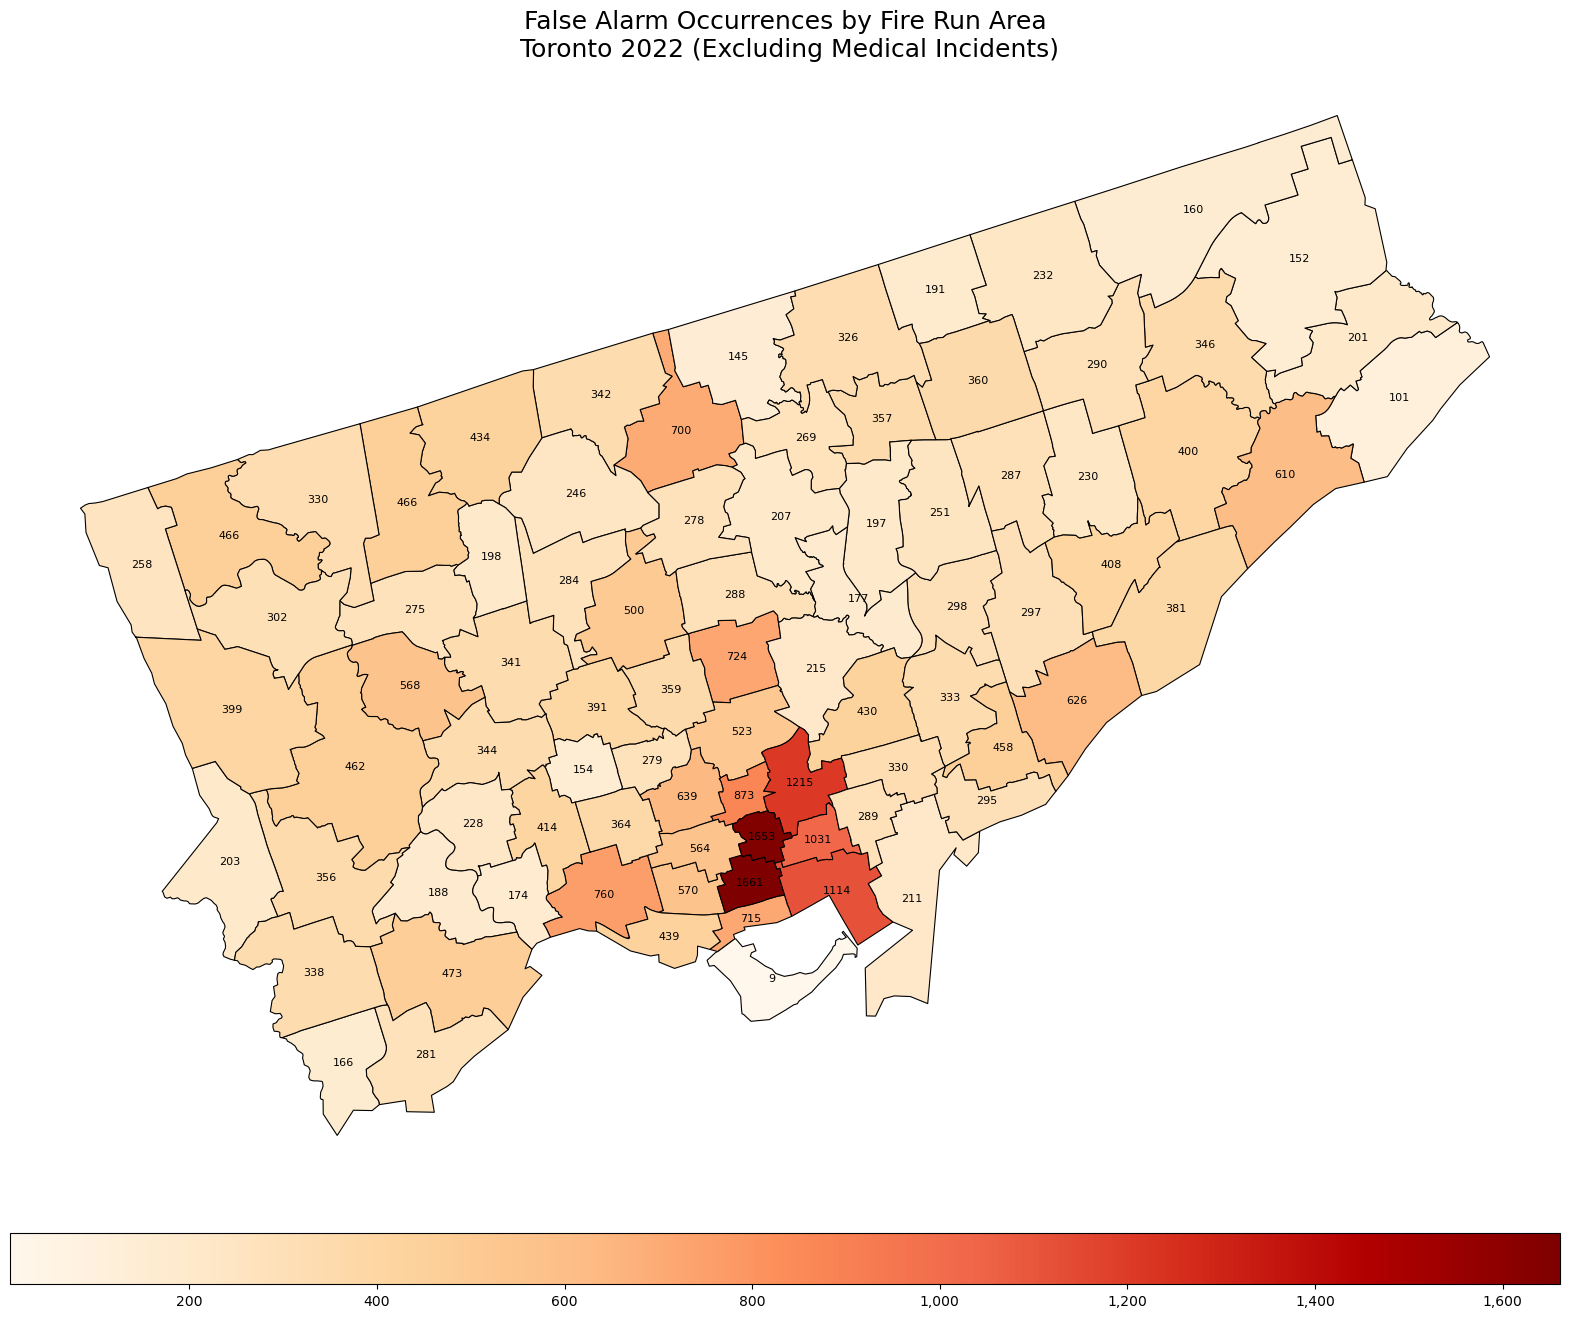

In [21]:
# Calculate the centroids for each run area.
run_areas_with_false_alarms['centroid'] = run_areas_with_false_alarms.geometry.centroid

# Plot the map
fig, ax = plt.subplots(figsize=(20, 20))
norm = Normalize(vmin=run_areas_with_false_alarms['False_Alarm_Count'].min(), vmax=run_areas_with_false_alarms['False_Alarm_Count'].max())
cmap = cm.get_cmap('OrRd')
run_areas_with_false_alarms.plot(ax=ax, column='False_Alarm_Count', cmap='OrRd', linewidth=0.8, edgecolor='k', legend=False, norm=norm)

# Add and format color bar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.03, aspect=30).ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add the number of false alarms in the center of each shape
for idx, row in run_areas_with_false_alarms.iterrows():
    plt.text(row['centroid'].x, row['centroid'].y, str(row['False_Alarm_Count']),
             fontsize=8, ha='center', va='center')

# Final touches
title_text = 'False Alarm Occurrences by Fire Run Area\n Toronto 2022 (Excluding Medical Incidents)'
ax.set_title(title_text, fontsize=18)
ax.set_axis_off()
plt.show()